<a href="https://colab.research.google.com/github/palakshahu/MLminiproject-PalakShahu-KrishSharma/blob/main/A4_58_A3_36_MLminiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PERFORMING SVM , LINEAR REGRESSION AND RANDOM FOREST ALGORITHMS ON THE TESLA STOCK PRICES DATASET**

#**1.Load and Inspect the Dataset**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import yfinance as yf  # To load stock data
import matplotlib.pyplot as plt

In [ ]:
# Read the csv file using read_csv
# method of pandas
data = pd.read_csv('Tesla-dataset.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2962,2022-04-04,1089.380005,1149.910034,1072.530029,1145.449951,1145.449951,27345300
2963,2022-04-05,1136.300049,1152.869995,1087.300049,1091.260010,1091.260010,26691700
2964,2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800
2965,2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,1057.260010,26482400


#**2. Data Cleaning and Formatting**



2.1 Overview of the Data

In [ ]:

# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2967 non-null   object 
 1   Open       2967 non-null   float64
 2   High       2967 non-null   float64
 3   Low        2967 non-null   float64
 4   Close      2967 non-null   float64
 5   Adj Close  2967 non-null   float64
 6   Volume     2967 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 162.4+ KB


2.2 Check for Missing Values

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


2.3 Check for Duplicates

In [ ]:

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicates if any are found
data = data.drop_duplicates()

Number of duplicate rows: 0


#**3. Exploratory Data Analysis (EDA)**



3.1 Dimensions of the Data

In [ ]:
# Check the shape of the data
print(f"Dataset dimensions: {data.shape}")

Dataset dimensions: (2967, 7)


3.2 Summary Statistics

In [ ]:


# Generate summary statistics for numeric columns
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2.967000e+03
mean,142.168589,145.308378,138.827751,142.232714,142.232714,3.128686e+07
std,256.017493,261.898733,249.638570,256.070663,256.070663,2.793747e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.899999,20.576999,19.523000,20.035000,20.035000,1.315400e+07
50%,46.830002,47.543999,45.858002,46.678001,46.678001,2.488110e+07
75%,68.357997,69.459000,67.100998,68.293000,68.293000,3.969725e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08



3.3 Visualizations

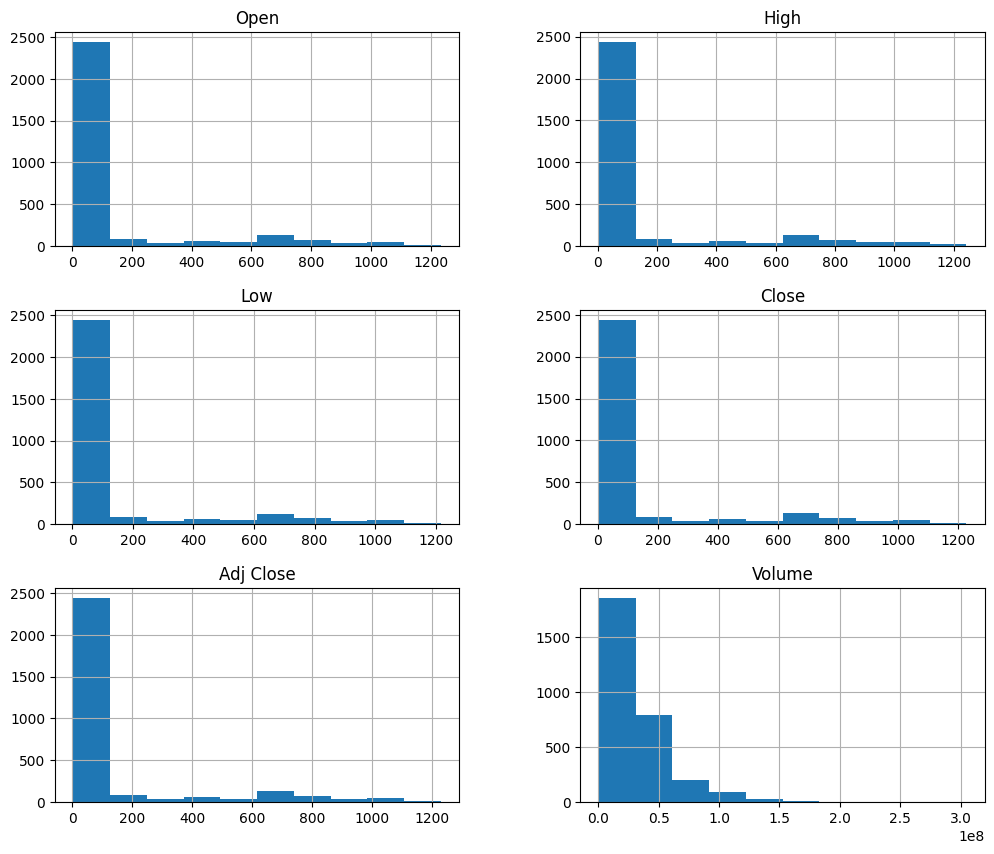

In [ ]:

# Plot histograms for each numerical column
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))
plt.show()

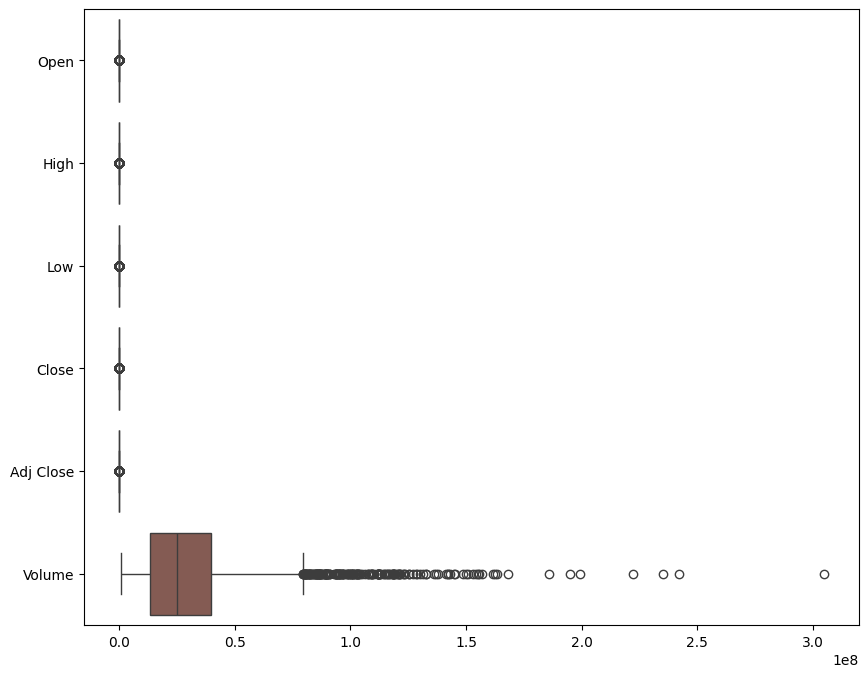

In [ ]:
# Plot boxplots for all features
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=data, orient='h')
plt.show()

#**4. Feature Engineering and Selection**



4.1 Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables, for example 'sex'
if 'Open' in data.columns:
    data['Open'] = LabelEncoder().fit_transform(data['Open'])

4.2. Feature Selection Based on Correlation

In [ ]:

import pandas as pd
import numpy as np
# Drop features with low correlation to prices
# Selected features based on correlation analysis
selected_features = [
    'Open',      # Correlation ~ 0.42 with target
    'High',              # Correlation ~ 0.42 with target
    'Low',           # Correlation ~ 0.34 with target
    'Close',        # Correlation ~ 0.46 with target
    'Adj Close',                 # Correlation ~ 0.53 with target
    'Volume'        # Correlation ~ -0.42 with target
]

# Check the actual column names in your DataFrame
print(data.columns)

# Assuming the target variable column is named 'Date', adjust accordingly
target_column = 'Date'  # Replace with the actual column name if different

# Keep only the selected features and the target variable
data_selected = data[selected_features + [target_column]]
data_selected.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Open,High,Low,Close,Adj Close,Volume,Date
0,13,5.000,3.508,4.778,4.778,93831500,2010-06-29
1,156,6.084,4.660,4.766,4.766,85935500,2010-06-30
2,142,5.184,4.054,4.392,4.392,41094000,2010-07-01
3,89,4.620,3.742,3.840,3.840,25699000,2010-07-02
4,27,4.000,3.166,3.222,3.222,34334500,2010-07-06


#**5. Train and Test Split with Cross-Validation**

5.1 Split the Data

In [ ]:
# Create predictor variables
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low

# Store all predictor variables in a variable X
X = data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,8.222,1.492
1,151.234,1.424
2,137.608,1.130
3,85.160,0.878
4,23.778,0.834


In [ ]:
# Target variables
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

**METHOD 1. SUPPORT VECTOR MACHINE**

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
data['Predicted_Signal'] = cls.predict(X)

In [ ]:
# Calculate daily returns
data['Return'] = data.Close.pct_change()

In [ ]:
# Calculate strategy returns
data['Strategy_Return'] = data.Return *data.Predicted_Signal.shift(1)

In [ ]:
# Calculate Cumulutive returns
data['Cum_Ret'] = data['Return'].cumsum()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
0,2010-06-29,13,5.000000,3.508000,4.778000,4.778000,93831500,8.222000,1.492000,1,NaN,NaN,NaN
1,2010-06-30,156,6.084000,4.660000,4.766000,4.766000,85935500,151.234000,1.424000,1,-0.002512,-0.002512,-0.002512
2,2010-07-01,142,5.184000,4.054000,4.392000,4.392000,41094000,137.608000,1.130000,1,-0.078473,-0.078473,-0.080984
3,2010-07-02,89,4.620000,3.742000,3.840000,3.840000,25699000,85.160000,0.878000,1,-0.125683,-0.125683,-0.206667
4,2010-07-06,27,4.000000,3.166000,3.222000,3.222000,34334500,23.778000,0.834000,1,-0.160937,-0.160937,-0.367605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2022-04-04,2649,1149.910034,1072.530029,1145.449951,1145.449951,27345300,1503.550049,77.380005,0,0.056113,0.000000,7.348060
2963,2022-04-05,2662,1152.869995,1087.300049,1091.260010,1091.260010,26691700,1570.739990,65.569946,0,-0.047309,-0.000000,7.300751
2964,2022-04-06,2640,1079.000000,1027.699951,1045.760010,1045.760010,29782800,1594.239990,51.300049,0,-0.041695,-0.000000,7.259056
2965,2022-04-07,2631,1076.589966,1021.539978,1057.260010,1057.260010,26482400,1573.739990,55.049988,0,0.010997,0.000000,7.270053


In [ ]:
# Plot Strategy Cumulative returns
data['Cum_Strategy'] = data['Strategy_Return'].cumsum()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
0,2010-06-29,13,5.000000,3.508000,4.778000,4.778000,93831500,8.222000,1.492000,1,NaN,NaN,NaN,NaN
1,2010-06-30,156,6.084000,4.660000,4.766000,4.766000,85935500,151.234000,1.424000,1,-0.002512,-0.002512,-0.002512,-0.002512
2,2010-07-01,142,5.184000,4.054000,4.392000,4.392000,41094000,137.608000,1.130000,1,-0.078473,-0.078473,-0.080984,-0.080984
3,2010-07-02,89,4.620000,3.742000,3.840000,3.840000,25699000,85.160000,0.878000,1,-0.125683,-0.125683,-0.206667,-0.206667
4,2010-07-06,27,4.000000,3.166000,3.222000,3.222000,34334500,23.778000,0.834000,1,-0.160937,-0.160937,-0.367605,-0.367605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,2022-04-04,2649,1149.910034,1072.530029,1145.449951,1145.449951,27345300,1503.550049,77.380005,0,0.056113,0.000000,7.348060,3.947172
2963,2022-04-05,2662,1152.869995,1087.300049,1091.260010,1091.260010,26691700,1570.739990,65.569946,0,-0.047309,-0.000000,7.300751,3.947172
2964,2022-04-06,2640,1079.000000,1027.699951,1045.760010,1045.760010,29782800,1594.239990,51.300049,0,-0.041695,-0.000000,7.259056,3.947172
2965,2022-04-07,2631,1076.589966,1021.539978,1057.260010,1057.260010,26482400,1573.739990,55.049988,0,0.010997,0.000000,7.270053,3.947172


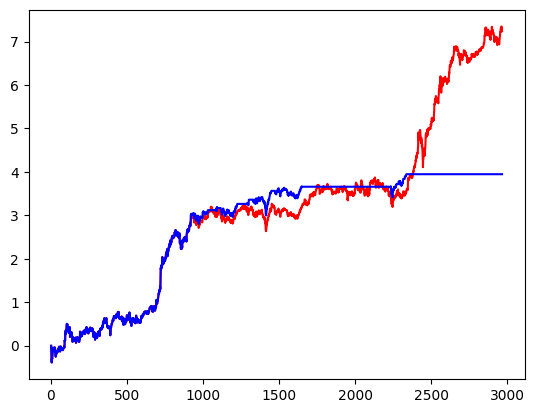

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data['Cum_Ret'],color='red')
plt.plot(data['Cum_Strategy'],color='blue')

**METHOD 2. Linear Regression**

In [ ]:
# Download stock data (for example, Tesla stock)
data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")
data = data[['Close']]  # Keep only the closing price
data.dropna(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TSLA
Date,
2020-01-02 00:00:00+00:00,28.684000
2020-01-03 00:00:00+00:00,29.534000
2020-01-06 00:00:00+00:00,30.102667
2020-01-07 00:00:00+00:00,31.270666
2020-01-08 00:00:00+00:00,32.809334


In [ ]:
# Create lagged features and moving averages
data['Previous_Close'] = data['Close'].shift(1)
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_10'] = data['Close'].rolling(window=10).mean()
data.dropna(inplace=True)

In [ ]:
# Define the target as the direction (1 for up, 0 for down)
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
data.dropna(inplace=True)

In [ ]:
# Define features and target variable
X = data[['Previous_Close', 'MA_5', 'MA_10']]
y = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict the next day's price
y_pred_continuous = model.predict(X_test)

# Convert the continuous prediction to up/down (1/0)
y_pred_direction = np.where(y_pred_continuous > X_test['Previous_Close'], 1, 0)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_direction)
print("Directional Prediction Accuracy:", accuracy)

Directional Prediction Accuracy: 0.52


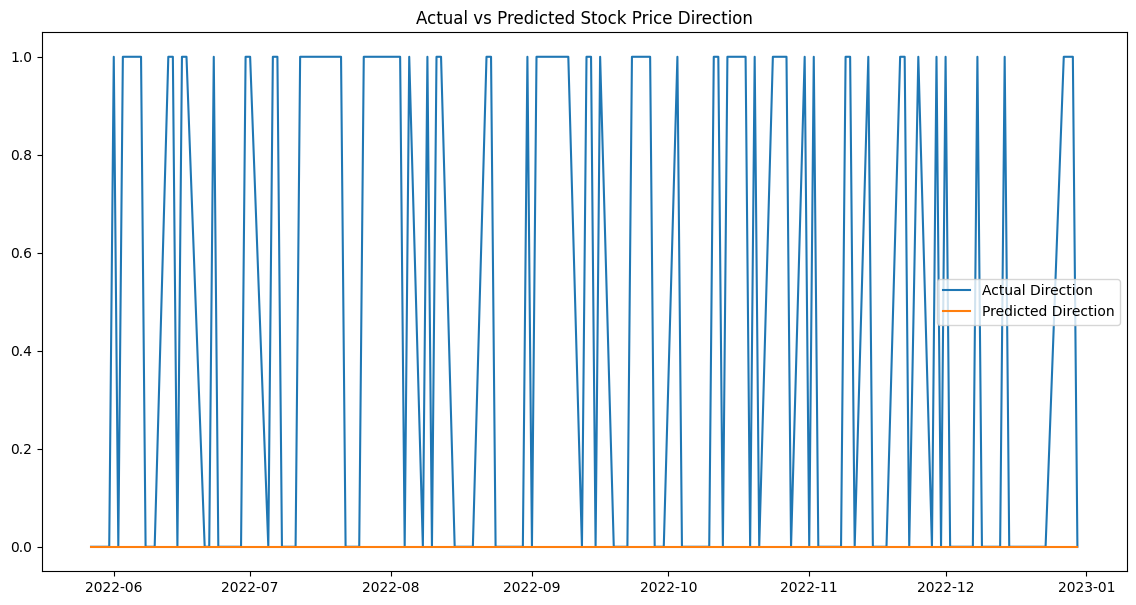

In [ ]:
# Plot actual vs predicted directions
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label="Actual Direction")
plt.plot(data.index[-len(y_test):], y_pred_direction, label="Predicted Direction")
plt.legend()
plt.title("Actual vs Predicted Stock Price Direction")
plt.show()

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred_direction)
precision = precision_score(y_test, y_pred_direction)
recall = recall_score(y_test, y_pred_direction)
f1 = f1_score(y_test, y_pred_direction)

print("Testing Set Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Optional: Confusion Matrix for deeper insight
conf_matrix = confusion_matrix(y_test, y_pred_direction)
print("Confusion Matrix:")
print(conf_matrix)


Testing Set Evaluation Metrics:
Accuracy: 0.52
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[78  0]
 [72  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Get model coefficients
coefficients = model.coef_
features = X.columns

# Display each feature's coefficient
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")

('Previous_Close', ''): 0.0019
('MA_5', ''): -0.0019
('MA_10', ''): -0.0002


**METHOD 3. Random Forest**

In [ ]:
# If using RandomForest or a similar model
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("Feature ranking:")
    for i in range(X.shape[1]):
        print(f"{i+1}. {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

    # Plotting feature importance
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
    plt.show()

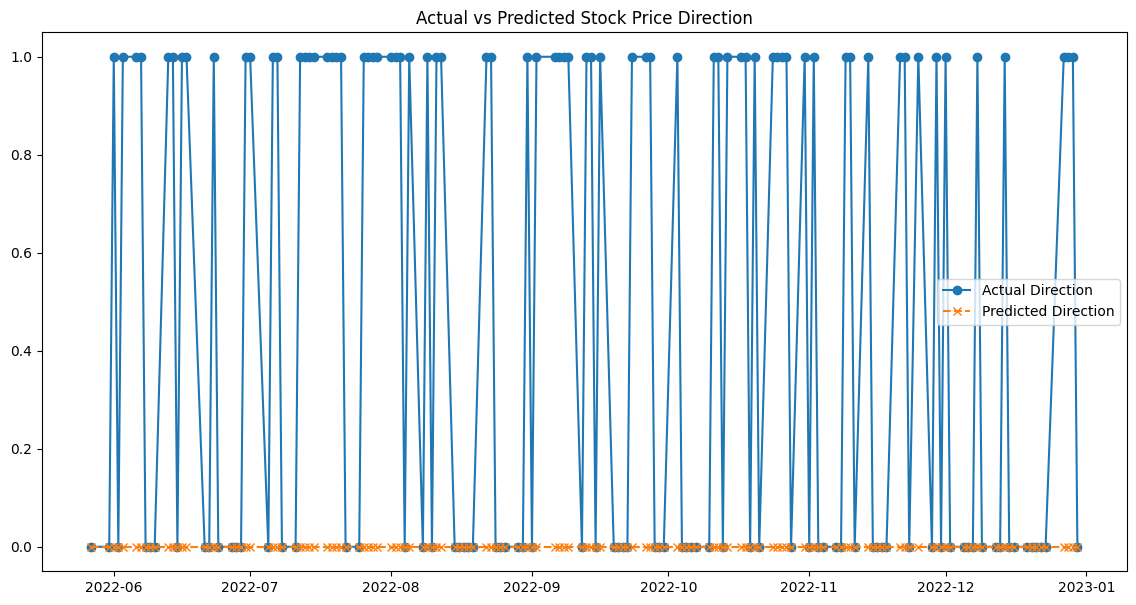

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label="Actual Direction", marker='o')
plt.plot(data.index[-len(y_test):], y_pred_direction, label="Predicted Direction", linestyle="--", marker='x')
plt.legend()
plt.title("Actual vs Predicted Stock Price Direction")
plt.show()

**EDA FOR LINEAR REG**

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 747 entries, 2020-01-15 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, TSLA)       747 non-null    float64
 1   (Previous_Close, )  747 non-null    float64
 2   (MA_5, )            747 non-null    float64
 3   (MA_10, )           747 non-null    float64
 4   (Target, )          747 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.0 KB
None

Summary Statistics:
Price        Close Previous_Close        MA_5       MA_10      Target
Ticker        TSLA                                                   
count   747.000000     747.000000  747.000000  747.000000  747.000000
mean    208.467337     208.350444  208.240178  207.932325    0.531459
std      94.486863      94.646393   94.468944   94.533145    0.499344
min      24.081333      24.081333   27.745067   30.75146

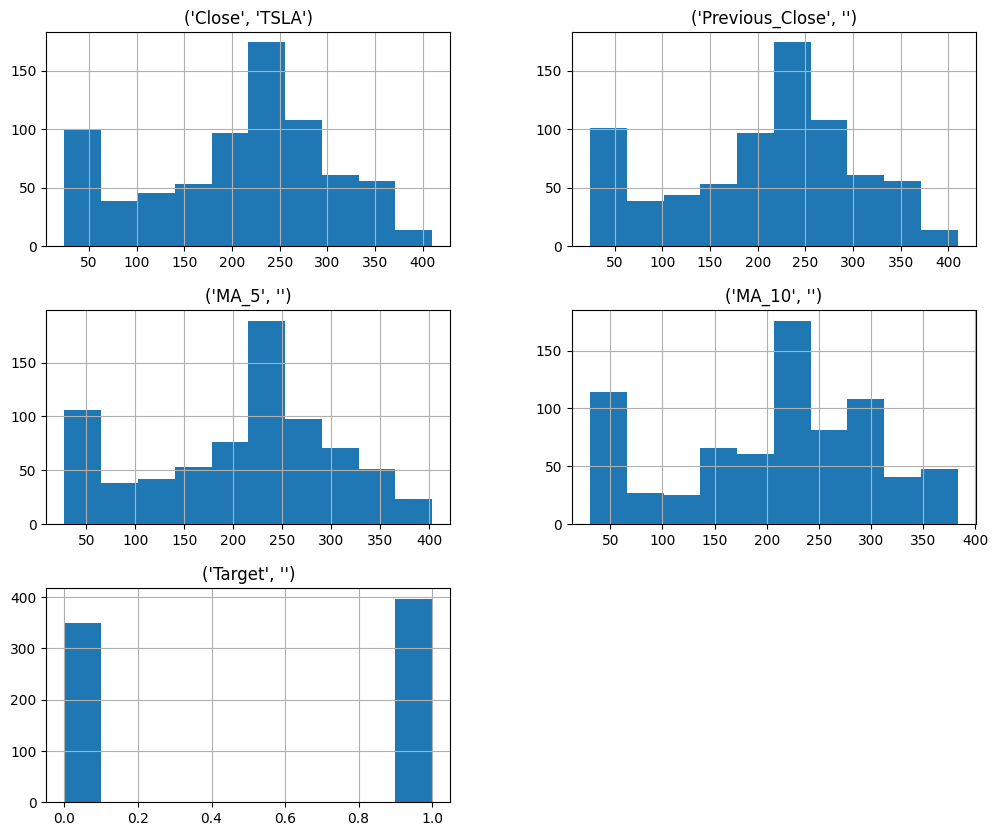

In [ ]:
# Plot histograms for each numerical column
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))
plt.show()

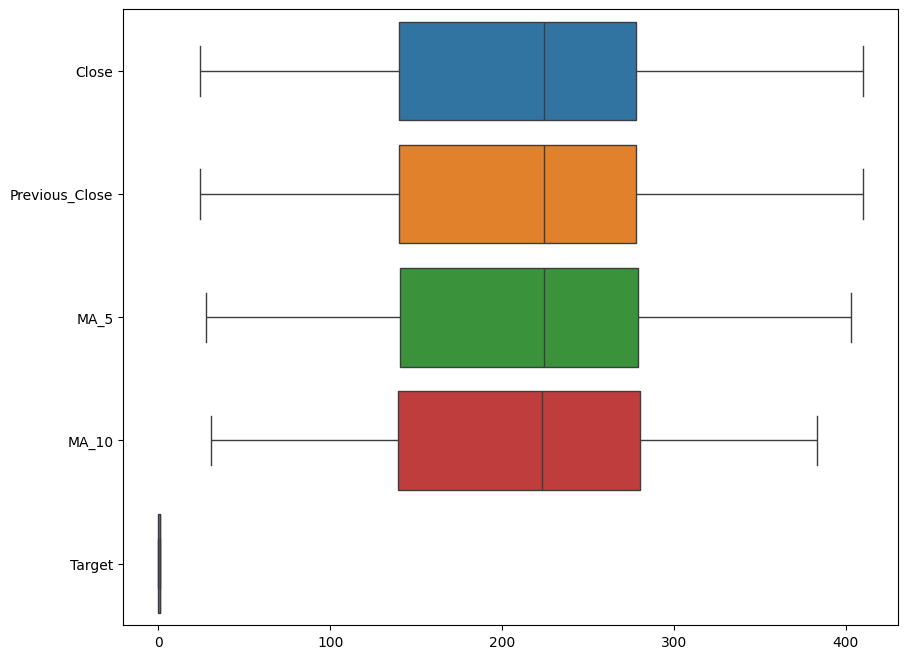

In [ ]:
# Plot boxplots for all features
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=data, orient='h')
plt.show()

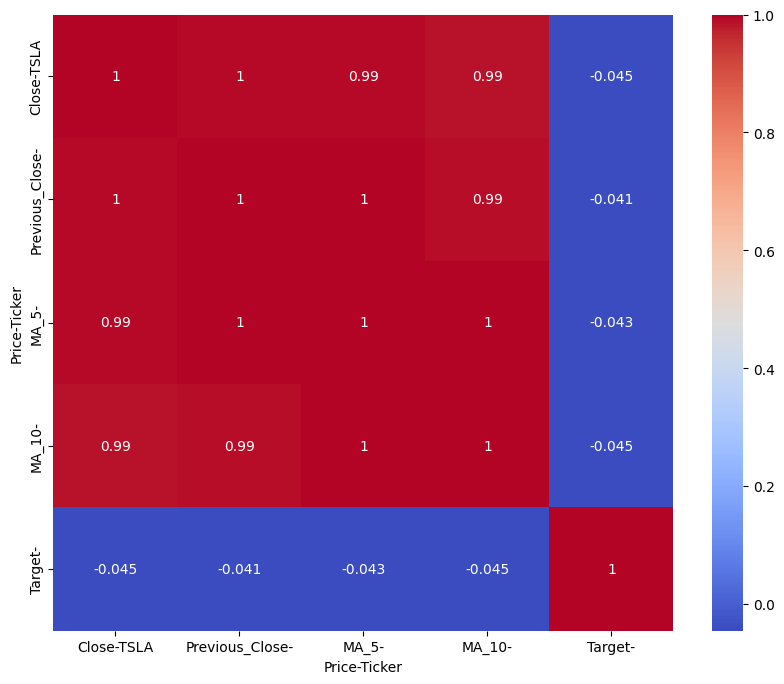

In [ ]:
# Generate a correlation matrix and plot as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

**Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.54166667 0.425      0.43697479 0.42857143 0.46218487]
Average cross-validation score: 0.45887955182072826


#**6.Model Comparison**

6.1 Train and Compare Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name}: {accuracy}")

Linear Regression: -0.017032108505350196
Random Forest: 0.46
SVM: 0.48


#**7. Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


# **8. Model Evaluation**

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.4533333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.26      0.33        78
           1       0.45      0.67      0.54        72

    accuracy                           0.45       150
   macro avg       0.45      0.46      0.43       150
weighted avg       0.45      0.45      0.43       150

ROC-AUC Score: 0.48976139601139607


#**9. Confusion Matrix**

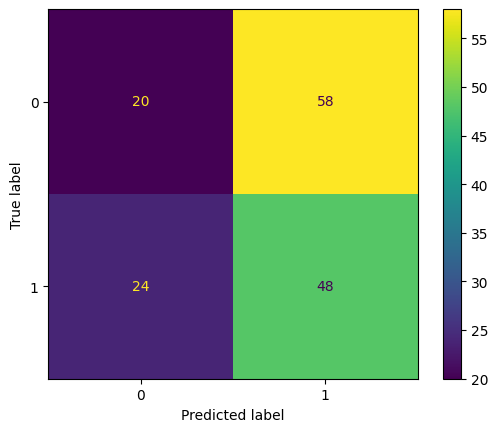

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()